## The following workbook is a demonstration by example for using multiple linear regression in statsmodels & sklearn. Non-linear models (quadratic and log-linear)  are investigated and the log-linear model shows the best fit of all the linear & non-linear models  
## For the first several examples, no data is held back for a test data set. While normally some data is withheld for a training and test split, to determine the best model, in this case the entire data set is used for training at first as the data set is relatively small & correlations low.   After this is done, the best-fitting set is reprocessed with a test-train split and a repeated cross-validation analysis.  

## Finally, KNN machine learning & CART (decision tree regression models) are illustrated and compared to the other regressions

## Some common pitfalls and data wrangling techniques are demonstrated by example

### The dataset is a real world example from reservoir engineering with data identity removed. The data in this workbook is normalized on a per ft basis. The data otherwise would have trends that appear with the common predictor length driving the correlations (Multicollinearity) 

In [3]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
#MID ADD
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
# For reproducibility
np.random.seed(1000)

nb_samples = 1000

path='C:\\users\\thede\\Documents\\CS-code\\github\\petroleum well analysis example\\'
#path='C:\\users\\yourusername\\Documents\\'
file='final wb.csv'

## Alt way to load CSV file (csv library; not pandas)

In [6]:
with open(path+file,'rt')as f:
#with open('C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv','rt')as f:
    datas = csv.reader(f)
    #reader = csv.DictReader(open("C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv"))
    #for row in reader:
    #    print(row)
    for row in datas:
        print(row)   

['ID', 'xloc', 'yloc', 'Mobility', 'BVf', 'lbs-ft', 'EUR-ft', 'CFF360']
['-7', '-873', '14736', '', '', '389', '48', '167']
['-7', '-873', '14736', '', '', '504', '', '']
['0', '3364', '5641', '', '5.38', '251', '59', '43']
['1', '3453', '7876', '20', '6', '317', '56', '69']
['2', '31136', '8032', '8', '5.7', '498', '76', '107']
['3', '31136', '8032', '9', '3.42', '497', '13', '139']
['8', '11547', '6965', '', '5.85', '470', '63', '100']
['12', '31441', '3878', '3', '', '465', '26', '116']
['15', '12258', '19567', '10', '4.74', '392', '39', '105']
['18', '122', '29865', '14', '', '490', '75', '107']
['19', '-72', '28303', '11', '5.92', '502', '50', '106']
['20', '-2639', '28712', '10', '6.46', '443', '55', '87']
['21', '-3772', '27982', '15', '', '257', '43', '']
['22', '-4596', '27235', '6', '', '38', '42', '']
['23', '', '', '4', '', '', '43', '']
['24', '6945', '13500', '11', '', '459', '59', '']
['25', '2056', '13316', '8', '6.4', '452', '48', '98']
['26', '6028', '10001', '14', '6

## Easiest way to load CSV (Pandas)

In [4]:
#Import CSV into a new pandas dataframe called result
result = pd.read_csv(path+file)

print(result[:64])

#Note zeros should be set to null, if not already fixed in CSV
#result.iloc[21,4]=float('NaN')
#result.iloc[22,4]=float('NaN')
print(result.iloc[21,4])
print(result.iloc[22,4])



     ID     xloc     yloc  Mobility   BVf  lbs-ft  EUR-ft  CFF360
0    -7   -873.0  14736.0       NaN   NaN   389.0    48.0   167.0
1    -7   -873.0  14736.0       NaN   NaN   504.0     NaN     NaN
2     0   3364.0   5641.0       NaN  5.38   251.0    59.0    43.0
3     1   3453.0   7876.0      20.0  6.00   317.0    56.0    69.0
4     2  31136.0   8032.0       8.0  5.70   498.0    76.0   107.0
5     3  31136.0   8032.0       9.0  3.42   497.0    13.0   139.0
6     8  11547.0   6965.0       NaN  5.85   470.0    63.0   100.0
7    12  31441.0   3878.0       3.0   NaN   465.0    26.0   116.0
8    15  12258.0  19567.0      10.0  4.74   392.0    39.0   105.0
9    18    122.0  29865.0      14.0   NaN   490.0    75.0   107.0
10   19    -72.0  28303.0      11.0  5.92   502.0    50.0   106.0
11   20  -2639.0  28712.0      10.0  6.46   443.0    55.0    87.0
12   21  -3772.0  27982.0      15.0   NaN   257.0    43.0     NaN
13   22  -4596.0  27235.0       6.0   NaN    38.0    42.0     NaN
14   23   

## Statistics of data input

In [33]:
result.describe()

,ID,xloc,yloc,Mobility,BVf,lbs-ft,EUR-ft,CFF360
count,64.000000,58.000000,58.000000,56.000000,25.000000,56.000000,61.000000,39.000000
mean,59.703125,11904.741379,9304.137931,10.267857,5.669600,398.875000,59.967213,107.846154
std,44.719826,12855.516174,13366.212279,5.072174,1.019843,131.997667,32.216438,26.513689
min,-7.000000,-10295.000000,-26303.000000,1.000000,3.420000,38.000000,12.000000,43.000000
25%,24.750000,2137.250000,4769.250000,6.750000,5.030000,349.000000,41.000000,90.500000
50%,44.500000,8065.000000,10286.000000,10.000000,5.790000,452.500000,50.000000,105.000000
75%,100.250000,22497.750000,15815.250000,13.250000,6.280000,490.000000,69.000000,121.500000
max,157.000000,34479.000000,30788.000000,27.000000,8.020000,542.000000,200.000000,167.000000


Text(0.5,1,'CFF360 histogram')

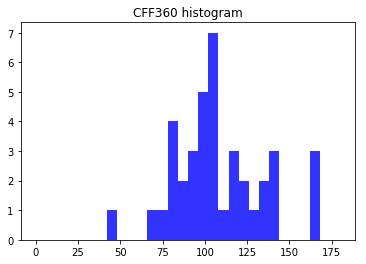

In [61]:
num_bins=30
#Remove nulls from plotting variable
plot_var=result["CFF360"][:64][~np.isnan(result["CFF360"])]
n, bins, patches = plt.hist(plot_var, num_bins, range=[0,180],facecolor='blue', alpha=0.8)
plt.title("CFF360 histogram")

## 4 parameter linear regression
## no intercept by default (note artificially high r^2)
This is because no intercept is used. This will be corrected in the next example.

In [5]:

#df = pd.DataFrame(data.data, columns=data.feature_names)
target = result["CFF360"][:64]
y = target
target2 = result["EUR-ft"][:64]
y2=target2
target3 = result["Mobility"][:64]
y3=target3
#print(target)
X = result[["xloc","yloc","BVf","lbs-ft"]][:64]
#X = result["yloc"][:64]
print(X)



       xloc     yloc   BVf  lbs-ft
0    -873.0  14736.0   NaN   389.0
1    -873.0  14736.0   NaN   504.0
2    3364.0   5641.0  5.38   251.0
3    3453.0   7876.0  6.00   317.0
4   31136.0   8032.0  5.70   498.0
5   31136.0   8032.0  3.42   497.0
6   11547.0   6965.0  5.85   470.0
7   31441.0   3878.0   NaN   465.0
8   12258.0  19567.0  4.74   392.0
9     122.0  29865.0   NaN   490.0
10    -72.0  28303.0  5.92   502.0
11  -2639.0  28712.0  6.46   443.0
12  -3772.0  27982.0   NaN   257.0
13  -4596.0  27235.0   NaN    38.0
14      NaN      NaN   NaN     NaN
15   6945.0  13500.0   NaN   459.0
16   2056.0  13316.0  6.40   452.0
17   6028.0  10001.0  6.76   521.0
18  12459.0  24798.0  6.28   542.0
19  12088.0  23338.0  4.39   468.0
20  12571.0  20806.0  4.21   487.0
21   2381.0  30788.0   NaN   360.0
22   1340.0  30253.0   NaN   485.0
23  12181.0  17941.0  6.05   474.0
24  12257.0  15964.0  5.87   462.0
25  10728.0  15546.0  6.64   453.0
26   9798.0  15905.0  8.02    78.0
27   7870.0  16528.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     99.11
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           6.86e-13
Time:                        08:57:04   Log-Likelihood:                -110.10
No. Observations:                  24   AIC:                             228.2
Df Residuals:                      20   BIC:                             232.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xloc           0.0018      0.001      2.703      0.014       0.000       0.003
yloc           0.0015      0.001      1.773      0.091      -0.000       0.003
BVf            7.1153      3.100      2.295      0.033       0.649      13.582
lbs-ft         0.0464      0.049      0.955      0.351      -0.055       0.148
==============================================================================
Omnibus:                        4.014   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.828
Skew:                           0.839   Prob(JB):                        0.243
Kurtosis:                       3.103   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

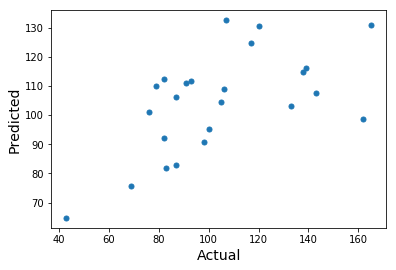

In [6]:
model = sm.OLS(y, X,missing='drop').fit()
predictions = model.predict(X) # make the predictions by the model
plt.plot(y,predictions, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
# Print out the statistics
model.summary()

## 4 parameter linear regression with intercept
## Caution with using statsmodels: last model r^2 was overinflated, even on the own training set....
This is because no intercept is used. When adding in intercept (one cell down), R^2 matches that of R (two cells down) very well.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2.599
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0690
Time:                        13:47:07   Log-Likelihood:                -110.08
No. Observations:                  24   AIC:                             230.2
Df Residuals:                      19   BIC:                             236.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4245     53.216     -0.177      0.861    -120.807     101.958
xloc           0.0019      0.001      2.541      0.020       0.000       0.003
yloc           0.0016      0.001      1.739      0.098      -0.000       0.003
BVf            8.1120      6.463      1.255      0.225      -5.416      21.640
lbs-ft         0.0530      0.062      0.852      0.405      -0.077       0.183
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.421
Skew:                           0.778   Prob(JB):                        0.298
Kurtosis:                       2.985   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

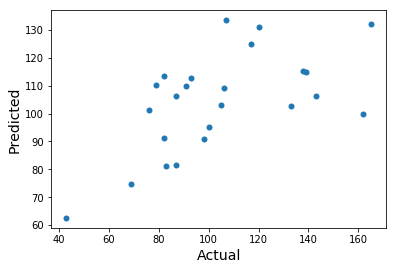

In [84]:
X_c=X.copy()
X_c=sm.add_constant(X_c)
#display(X_c)
model_c = sm.OLS(y, X_c,missing='drop').fit()
#predictions_c = model.predict(X_c) # make the predictions by the model
#plt.plot(y,predictions_c, linestyle='None',marker='.',markersize=10)
#plt.xlabel("Actual EUR",fontsize=14)
#plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
predictions_c = model_c.predict(X_c) # make the predictions by the model
plt.plot(y,predictions_c, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
model_c.summary()


# Excerpt from R studio, showing similar r^2 as the "with intercept" example above 
Call:
lm(formula = CFF360 ~ BVf + lbs.ft + xloc + yloc, data = wb_trun)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.571 -19.429  -4.504  10.863  62.170 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -9.4244932 53.2161774  -0.177   0.8613  
BVf          8.1120328  6.4632843   1.255   0.2247  
lbs.ft       0.0530266  0.0622389   0.852   0.4048  
xloc         0.0018552  0.0007300   2.541   0.0199 *
yloc         0.0015606  0.0008976   1.739   0.0983

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.7 on 19 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.2175 
F-statistic: 2.599 on 4 and 19 DF,  p-value: 0.06903



 # <Center>Q-Q plot shows right-skewed (heavy-tailed; log behavior?) </center>
![title](QQ360-4.png)
# <Center>Residual plot shows non-constant variance (Heteroskedasticity). </center>
## <Center> A behavior other than linear may be present (this will be looked into later) </center>
![title](resid360-4.png)

## The following exersize shows how to remove the nulls from the dataframe 
### (this is not necessary in statsmodels, but is necessary for sklearn example later)

..




In [89]:

X_noN=X.copy()
y_noN=y.copy()
for i in range(0,X["BVf"].size):
    #print(i,"=",X3b.iloc[i,1])
    for j in range(0,3):
        if math.isnan(X.iloc[i,j]):
            #print("not a number at i,j",i,j,", <do some removal>....")
            #X_noNaN.iloc[i,j]=float('NaN')
            ;
#print("-9999  values with missing BV, to keep same observation set as 2c")
X_noN["CFF360"]=y
X_noN=X_noN.dropna(how='any',axis=0)
y_noN=X_noN["CFF360"]
del(X_noN["CFF360"])
display(X_noN)
#display(y_noN)

X_noN=sm.add_constant(X_noN)
model_noN = sm.OLS(y_noN, X_noN).fit()
model_noN.summary()

,xloc,yloc,BVf,lbs-ft
2,3364.0,5641.0,5.38,251.0
3,3453.0,7876.0,6.00,317.0
4,31136.0,8032.0,5.70,498.0
5,31136.0,8032.0,3.42,497.0
6,11547.0,6965.0,5.85,470.0
8,12258.0,19567.0,4.74,392.0
10,-72.0,28303.0,5.92,502.0
11,-2639.0,28712.0,6.46,443.0
16,2056.0,13316.0,6.40,452.0
17,6028.0,10001.0,6.76,521.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2.599
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0690
Time:                        14:54:56   Log-Likelihood:                -110.08
No. Observations:                  24   AIC:                             230.2
Df Residuals:                      19   BIC:                             236.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4245     53.216     -0.177      0.861    -120.807     101.958
xloc           0.0019      0.001      2.541      0.020       0.000       0.003
yloc           0.0016      0.001      1.739      0.098      -0.000       0.003
BVf            8.1120      6.463      1.255      0.225      -5.416      21.640
lbs-ft         0.0530      0.062      0.852      0.405      -0.077       0.183
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.421
Skew:                           0.778   Prob(JB):                        0.298
Kurtosis:                       2.985   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting meaning of coefficients 

### meaning of lbs-ft coefficient and p, t value.
For every 100 increase in lbs-ft, EUR/ft expected increase by
0.053*100 = 5.3
#### However this predictor has a poor p value (p=0.41); we may accept the null hypothesis. This predictor will be removed in a following model

the t & p value refer to H0, the null hypothesis.  the p value means that that the coefficient is 0 (accept the null hypothesis) with a 40% chance.
p value: the probability of finding a t value of this size if the null hypothesis is true

(H0 : the parameter is zero, H 1 : The parameter is not zero) 

### meaning of location coefficients (xloc, yloc)
For every 1000' increase in coordinate southward, EUR/ft increase by 1.6 
0.0016*1000 = 1.6
This p value is 0.098

For every 1000' increase in coordinate eastward, CFF360 increase by 1.9
0.0019*1000 = 1.9
This p value is 0.02

### meaning of geologic parameter (BVf)
for every 1 increase in BVf, CFF360 increases by 8.11
The p value is 0.225 which isn't very strong (Most parameters aren't statistically significant until p < 0.05


Text(0,0.5,'Predicted')

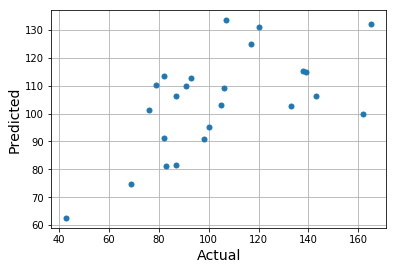

In [15]:
predictions_noN = model_noN.predict(X_noN) # make the predictions by the model
plt.plot(y_noN,predictions_noN, linestyle='None',marker='.',markersize=10)
plt.grid()
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)

## 4 parameter linear regression: sklearn. Note removing nulls is required in this case 

No explicit intecept
FYI.  sklearn has no regression summary (reasons why answered in post below) 

https://stackoverflow.com/questions/26319259/sci-kit-and-regression-summary


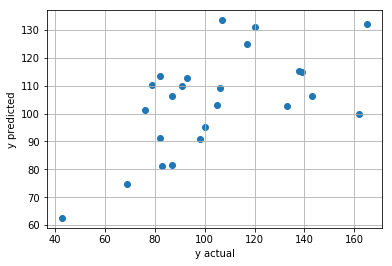

In [16]:
lr1=LinearRegression()
lr1.fit(X_noN,y_noN)
predictions_noN_LR=lr1.predict(X_noN)

#display(predictions_noN_LR)
#display(y_noN.values)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.grid()
plt.scatter(y_noN.values,predictions_noN_LR)
plt.show()

#Need to show r^2 here for comparison.....results look the same
#metrics.classification_report(y_noN.values,predictions_noN_LR)


In [88]:

c1=np.c_[X_c,y,predictions_c]
#c2=np.c_[X_test2,Y_test2]
#display(c)
d1={'xloc':c1[:,1],'yloc':c1[:,2],'BVf':c1[:,3],'lbs-ft':c1[:,4],'CFF360(Actual)':c1[:,5],'CFF360(Pred.)':c1[:,6]}
#d2={'Xtest0':c2[:,0],'Xtest1':c2[:,1],'Ytest':c2[:,2]}
#,'Xtest':X_test2,'Ytrain':Y_train2,'Ytest':Y_test2}
XYactualAndPred=pd.DataFrame(data=d1)
#XYtest2=pd.DataFrame(data=d2)

print("4 predictors, linear")
display(XYactualAndPred)#[:15])

4 predictors, linear


,xloc,yloc,BVf,lbs-ft,CFF360(Actual),CFF360(Pred.)
0,-873.0,14736.0,NaN,389.0,167.0,NaN
1,-873.0,14736.0,NaN,504.0,NaN,NaN
2,3364.0,5641.0,5.38,251.0,43.0,62.571843
3,3453.0,7876.0,6.00,317.0,69.0,74.754036
4,31136.0,8032.0,5.70,498.0,107.0,133.518110
5,31136.0,8032.0,3.42,497.0,139.0,114.969649
6,11547.0,6965.0,5.85,470.0,100.0,95.244300
7,31441.0,3878.0,NaN,465.0,116.0,NaN
8,12258.0,19567.0,4.74,392.0,105.0,103.089145
9,122.0,29865.0,NaN,490.0,107.0,NaN



## 3 parameter linear regression (drop 1 predictor) . Best linear model; Result as strong adj. r^2 as 4 param model
## Note the predictor that was removed: lbs-ft !  
### adjusted R^2 = 0.33, RMSE = 24 (Mean is ~ 108)

MSE= 585.7190545644224 , RMSE= 24.201633303651686


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.268
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0427
Time:                        11:53:09   Log-Likelihood:                -110.53
No. Observations:                  24   AIC:                             229.1
Df Residuals:                      20   BIC:                             233.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7315     42.322      0.419      0.680     -70.550     106.013
yloc           0.0018      0.001      2.098      0.049    1.01e-05       0.004
BVf            6.5343      6.150      1.063      0.301      -6.294      19.362
xloc           0.0020      0.001      2.876      0.009       0.001       0.003
==============================================================================
Omnibus:                        6.828   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.769
Skew:                           1.017   Prob(JB):                       0.0922
Kurtosis:                       3.795   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

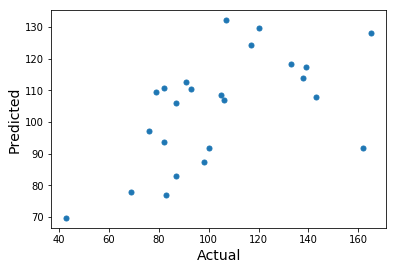

In [21]:
X2 = result[["yloc","BVf","xloc"]][:64]
#X2 will be a new pandas dataframe (not a reference)
X2=sm.add_constant(X2)
model2 = sm.OLS(y, X2,missing='drop').fit()

predictions2 = model2.predict(X2) # make the predictions by the model
plt.plot(y,predictions2, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predicted",fontsize=14)
d_y={'y_p':predictions2,'y':y}
df_y = pd.DataFrame(data=d_y)
df_y=df_y.dropna(how='any',axis=0)


MSE=np.average(np.power(df_y["y"]-df_y["y_p"],2))
print("MSE=",MSE,", RMSE=",np.power(MSE,0.5))
#print(np.c_[y,predictions2])
# Print out the statistics
model2.summary()

 # <Center>Q-Q plot shows right-skewed (heavy-tailed; log behavior?) </center>
![title](QQ360.png)
# <Center>Residual plot shows non-constant variance (Heteroskedasticity). </center>
## <Center> A behavior other than linear may be present (this will be looked into later) </center>
![title](resid360.png)


## 3 parameter linear regression with train/test split

,Y1,Y2
6,100.0,98.116394
23,138.0,113.864841
31,83.0,82.443629
25,93.0,112.107267
28,76.0,97.079312
4,107.0,145.308268
37,117.0,137.573708
18,165.0,124.221840


r^2 for test set 0.2588558710782153


C:\Users\thede\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1.742
Date:                Thu, 20 Jun 2019   Prob (F-statistic):              0.212
Time:                        20:44:25   Log-Likelihood:                -74.255
No. Observations:                  16   AIC:                             156.5
Df Residuals:                      12   BIC:                             159.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6094     55.833      0.315      0.758    -104.041     139.260
yloc           0.0012      0.001      1.021      0.327      -0.001       0.004
BVf            7.6384      7.634      1.001      0.337      -8.994      24.270
xloc           0.0024      0.001      2.233      0.045    5.83e-05       0.005
==============================================================================
Omnibus:                        6.435   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.539
Skew:                           1.054   Prob(JB):                        0.170
Kurtosis:                       3.930   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

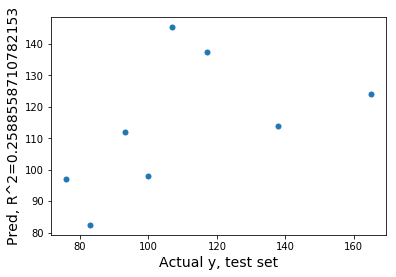

In [251]:
np.random.seed(3)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y, test_size=0.3)
#display(X_train2)
#X2 will be a new pandas dataframe (not a reference)
model2_train = sm.OLS(Y_train2, X_train2,missing='drop').fit()

predictions2_test = model2_train.predict(X_test2) # make the predictions by the model
plt.plot(Y_test2,predictions2_test, linestyle='None',marker='.',markersize=10)
#import scipy.stats.linregress
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Y_test2,predictions2_test)

d = {'Y1': Y_test2, 'Y2': predictions2_test}
df = pd.DataFrame(data=d)

df=df.dropna(how='any',axis=0)
display(df)

co  = np.corrcoef(df['Y1'],df['Y2'])[0,1]
co=np.power(co,2)
print("r^2 for test set",co)
plt.xlabel("Actual y, test set",fontsize=14)
plt.ylabel("Pred, R^2="+str(co),fontsize=14)

#print("Actual, predictions")
#print(np.c_[y,predictions2])
# Print out the statistics
model2_train.summary()

##  3 parameter linear regression with 3-fold cross-validation,  repeated
### RMSE is slightly worse (~31 vs 24 from above with full dataset used in training)

In [87]:
from sklearn.model_selection import KFold
np.random.seed(10)
kf = KFold(n_splits=3, shuffle=True)
co=[]
MSE_array=[]
for i in range(1,10):
    for train, test in kf.split(X2):
        #display(X2.iloc[train])
        cv_train = sm.OLS(y[train],X2.iloc[train] ,missing='drop').fit()
        #display(X2.iloc[test])
        pred=cv_train.predict(X2.iloc[test]) # make the predictions by the model
        d = {'Y1': y[test], 'Ypredict': pred}
        df = pd.DataFrame(data=d)
        df=df.dropna(how='any',axis=0)
        new=np.power( np.corrcoef(df['Y1'],df['Ypredict'])[0,1],2)
        co.append(new)
        print("r^2, test set",new)
        print("SSE",sum((np.power(df['Y1']-df['Ypredict'],2))))
        MSE=np.average(np.power(df['Y1']-df['Ypredict'],2))
        MSE_array.append(MSE)
        print("MSE",MSE)
         
        if i==1:display(df)
            
print("\navg CV test score over 10 iterations of 3-fold CV:",np.average(co))
print("\navg MSE test score over 10 iterations of 3-fold CV:",np.average(MSE_array))
print("\navg RMSE test score over 10 iterations of 3-fold CV:",np.power(np.average(MSE_array),0.5))



r^2, test set 0.1440087173392913
SSE 13480.902331324975
MSE 1225.5365755749979


,Y1,Ypredict
2,43.0,63.451058
3,69.0,66.376351
6,100.0,79.792250
10,106.0,109.323829
17,162.0,73.045826
19,91.0,126.331864
20,143.0,121.894620
23,138.0,106.521368
26,133.0,88.906563
27,82.0,89.874921


r^2, test set 0.34303316828694747
SSE 4368.04041584645
MSE 624.00577369235


,Y1,Ypredict
4,107.0,143.590292
5,139.0,122.343824
18,165.0,127.527260
24,79.0,110.537969
30,87.0,81.425876
31,83.0,78.044583
37,117.0,134.241984


r^2, test set 0.0497737894075318
SSE 2473.72762789043
MSE 412.28793798173837


,Y1,Ypredict
8,105.0,113.740718
11,87.0,117.544506
16,98.0,92.923187
25,93.0,115.239029
28,76.0,101.905092
29,82.0,98.520848


r^2, test set 0.32149192946078886
SSE 4321.407499475295
MSE 617.3439284964707
r^2, test set 0.08541178809257581
SSE 20713.00186851276
MSE 1593.3078360394431
r^2, test set 0.25713578899818995
SSE 2737.5422198029846
MSE 684.3855549507462
r^2, test set 0.01424298467118402
SSE 6079.842895288116
MSE 759.9803619110144
r^2, test set 0.12977313982304856
SSE 9285.86029248515
MSE 1326.5514703550214
r^2, test set 0.5554961347096689
SSE 9081.809458338845
MSE 1009.0899398154272
r^2, test set 0.12056428446051068
SSE 12311.297433205073
MSE 1231.1297433205075
r^2, test set 0.27355623371531285
SSE 7581.366031426561
MSE 947.6707539283201
r^2, test set 0.24542092700341359
SSE 7768.341586599508
MSE 1294.7235977665848
r^2, test set 0.8146888523708684
SSE 2969.8073879198582
MSE 742.4518469799646
r^2, test set 0.6191371181688207
SSE 4080.0931116372053
MSE 453.3436790708006
r^2, test set 0.08119404362820781
SSE 13546.957374890035
MSE 1231.5415795354577
r^2, test set 0.12562719017486676
SSE 10324.638036908262


## 3-param model (nulls removed; no change in results)

In [86]:
#Exclude row=26, ID=39 from previous plot, visible outlier
#X2.iloc[26,0]=float('NaN')
#X2.iloc[26,1]=float('NaN')
#X2.iloc[26,2]=float('NaN')
#print("X2, row 26 after setting nulls\n",X2.iloc[26,:],"\n")

#print("result dataframe row 26, after the above process \n",result.iloc[26,:],"\n")
#this verifies that X2 was a copy of result, and not a reference to the original result data frame
model2_ol = sm.OLS(y, X2,missing='drop').fit()
predictions2_ol = model2_ol.predict(X2) # make the predictions by the model
#plt.plot(y,predictions2_ol, linestyle='None',marker='.',markersize=10)
#plt.xlabel("Actual EUR",fontsize=14)
#plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics

model2_ol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.268
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0427
Time:                        13:48:52   Log-Likelihood:                -110.53
No. Observations:                  24   AIC:                             229.1
Df Residuals:                      20   BIC:                             233.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7315     42.322      0.419      0.680     -70.550     106.013
yloc           0.0018      0.001      2.098      0.049    1.01e-05       0.004
BVf            6.5343      6.150      1.063      0.301      -6.294      19.362
xloc           0.0020      0.001      2.876      0.009       0.001       0.003
==============================================================================
Omnibus:                        6.828   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.769
Skew:                           1.017   Prob(JB):                       0.0922
Kurtosis:                       3.795   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
c1=np.c_[X2,y,predictions2_ol]

d1={'yloc':c1[:,1],'BVf':c1[:,2],'x-loc':c1[:,3],'y(Actual)':c1[:,4],'y(Pred.)':c1[:,5]}

XYactualAndPred=pd.DataFrame(data=d1)


print("3 predictors, linear ")
display(XYactualAndPred[:20])
display(XYactualAndPred[20:40])
display(XYactualAndPred[40:64])

3 predictors, linear 


,yloc,BVf,x-loc,y(Actual),y(Pred.)
0,14736.0,NaN,-873.0,167.0,NaN
1,14736.0,NaN,-873.0,NaN,NaN
2,5641.0,5.38,3364.0,43.0,69.742425
3,7876.0,6.00,3453.0,69.0,77.966024
4,8032.0,5.70,31136.0,107.0,132.064832
5,8032.0,3.42,31136.0,139.0,117.166656
6,6965.0,5.85,11547.0,100.0,91.667465
7,3878.0,NaN,31441.0,116.0,NaN
8,19567.0,4.74,12258.0,105.0,108.361539
9,29865.0,NaN,122.0,107.0,NaN


,yloc,BVf,x-loc,y(Actual),y(Pred.)
20,20806.0,4.21,12571.0,143.0,107.742625
21,30788.0,NaN,2381.0,101.0,NaN
22,30253.0,NaN,1340.0,NaN,NaN
23,17941.0,6.05,12181.0,138.0,113.861323
24,15964.0,5.87,12257.0,79.0,109.306218
25,15546.0,6.64,10728.0,93.0,110.509942
26,15905.0,8.02,9798.0,133.0,118.294720
27,16528.0,7.30,7870.0,82.0,110.818212
28,14707.0,5.79,7582.0,76.0,97.117763
29,14346.0,5.67,6602.0,82.0,93.714023


,yloc,BVf,x-loc,y(Actual),y(Pred.)
40,2442.0,NaN,-413.0,NaN,NaN
41,4791.0,NaN,961.0,NaN,NaN
42,-11452.0,NaN,17465.0,NaN,NaN
43,15289.0,5.38,24473.0,120.0,129.513337
44,15437.0,NaN,22152.0,NaN,NaN
45,11335.0,NaN,22332.0,NaN,NaN
46,9412.0,NaN,22553.0,NaN,NaN
47,10571.0,NaN,34479.0,99.0,NaN
48,10579.0,NaN,32569.0,103.0,NaN
49,10952.0,NaN,33687.0,NaN,NaN


## 3 parameter log-linear model
The results (in terms of RMSE and cross-plot of predicted/actual) are almost identical to the best 3 parameter linear model above.  The R^2 looks improved in the log-linear model and this is best illustrated graphically (two cells down). The previous Q-Q plot for the linear model showing heavy tailed behavior also confirms this log relationship is appropriate.

,y_p,y
0,NaN,167.0
1,NaN,NaN
2,68.138048,43.0
3,74.567265,69.0
4,134.527320,107.0
5,114.939158,139.0
6,86.529595,100.0
7,NaN,116.0
8,105.170417,105.0
9,NaN,107.0


,y_p,y
2,68.138048,43.0
3,74.567265,69.0
4,134.527320,107.0
5,114.939158,139.0
6,86.529595,100.0
8,105.170417,105.0
10,103.952630,106.0
11,102.840142,87.0
16,83.029890,98.0
17,86.821890,162.0


MSE= 605.4773541426213 , RMSE= 24.606449442018675


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.360
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0162
Time:                        20:18:52   Log-Likelihood:                 1.0981
No. Observations:                  24   AIC:                             5.804
Df Residuals:                      20   BIC:                             10.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6617      0.404      9.059      0.000       2.819       4.505
yloc        2.032e-05   8.13e-06      2.498      0.021    3.35e-06    3.73e-05
BVf            0.0690      0.059      1.175      0.254      -0.054       0.192
xloc        2.195e-05   6.69e-06      3.280      0.004    7.99e-06    3.59e-05
==============================================================================
Omnibus:                        2.230   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.028
Skew:                           0.465   Prob(JB):                        0.598
Kurtosis:                       3.404   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

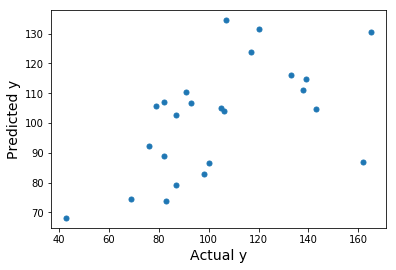

In [95]:
#Log y model
model2b_ol = sm.OLS(np.log(y), X2,missing='drop').fit()
predictions2b_ol = model2b_ol.predict(X2) # make the predictions by the model
print()

plt.plot(y,np.power(np.e,predictions2b_ol), linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual y",fontsize=14)
plt.ylabel("Predicted y",fontsize=14)
d_yl={'y_p':np.power(np.e,predictions2b_ol),'y':y}
df_yl = pd.DataFrame(data=d_yl)
display(df_yl)
df_yl=df_yl.dropna(how='any',axis=0)
display(df_yl)
MSE=np.average(np.power(df_yl["y"]-df_yl["y_p"],2))
print("MSE=",MSE,", RMSE=",np.power(MSE,0.5))
# Print out the statistics
#print(np.c_[y,predictions2b_ol])
model2b_ol.summary()

Text(0,0.5,'Predicted y')

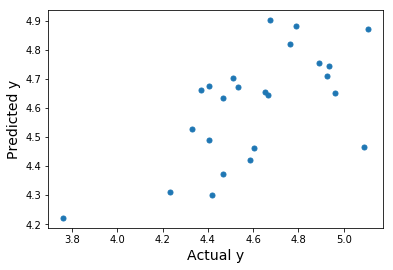

In [96]:
plt.plot(np.log(y),predictions2b_ol, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual y",fontsize=14)
plt.ylabel("Predicted y",fontsize=14)

## 3 parameter linear (+ 1 quadratic)  regression


In [103]:
#squared coefficients model

X2c=X2.copy()
X2c["BVf2"]=np.power(X2c["BVf"],2)#np.zeros(len(X2))

#np.power(X2c["lbs-ft2"],2)   #=X2["lbs-ft"]^2

#display(X2c)



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     2.905
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0495
Time:                        15:32:35   Log-Likelihood:                -109.59
No. Observations:                  24   AIC:                             229.2
Df Residuals:                      19   BIC:                             235.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.2900    134.137      1.314      0.204    -104.463     457.043
yloc           0.0017      0.001      1.971      0.063      -0.000       0.003
BVf          -48.1001     44.340     -1.085      0.292    -140.905      44.705
xloc           0.0018      0.001      2.427      0.025       0.000       0.003
BVf2           4.7107      3.787      1.244      0.229      -3.216      12.637
==============================================================================
Omnibus:                        8.359   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.160
Skew:                           1.086   Prob(JB):                       0.0460
Kurtosis:                       4.200   Cond. No.                     5.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

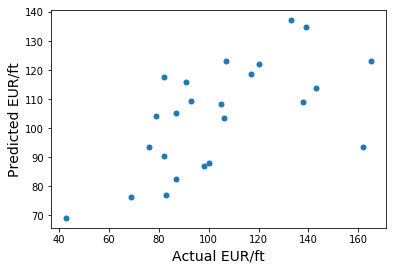

In [104]:
model2c_ol = sm.OLS(y, X2c,missing='drop').fit()
predictions2c_ol = model2c_ol.predict(X2c) # make the predictions by the model

plt.plot(y,predictions2c_ol, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)

model2c_ol.summary()

## 2 parameter linear regression
 


note extra # of observations when removing the BV column that contained many nulls


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CFF360   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5460
Date:                Wed, 19 Jun 2019   Prob (F-statistic):              0.584
Time:                        13:46:04   Log-Likelihood:                -182.08
No. Observations:                  39   AIC:                             370.2
Df Residuals:                      36   BIC:                             375.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7042      8.359     12.167      0.000      84.751     118.658
yloc           0.0001      0.000      0.274      0.785      -0.001       0.001
xloc           0.0004      0.000      1.045      0.303      -0.000       0.001
==============================================================================
Omnibus:                        3.426   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.291
Skew:                           0.555   Prob(JB):                        0.318
Kurtosis:                       3.423   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

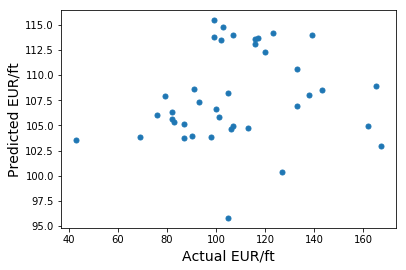

In [82]:
X3 = X2c.copy()
del(X3["BVf"])
model3 = sm.OLS(y, X3,missing='drop').fit()
predictions3 = model3.predict(X3) # make the predictions by the model
plt.plot(y,predictions3, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR/ft",fontsize=14)
plt.ylabel("Predicted EUR/ft",fontsize=14)

print("note extra # of observations when removing the BV column that contained many nulls")

model3.summary()


## KNN Example #1 (3 param linear regression; same as dataset X2)
### Knn classification is not ideal to use here with non-class result (numerical predictions). For illustrative purposes we break up the predictions into 4-9 equally spatially distributed classes.
### accuracy has very high variance, even with low number of classes


In [260]:
X2n= result[["yloc","BVf","xloc"]][:64]
np.random.seed(8)
df = pd.DataFrame(data=X2n)
df["y"]=y
df=df.dropna(how='any',axis=0)

#split scalar y into X classes, 0-15, 16-30, etc.
num_classes=7

yc=(df["y"]/(140/num_classes)).astype(int)
df["yclass"]=yc
display(df)
del(df["y"])
del(df["yclass"])
X_train, X_test, Y_train, Y_test = train_test_split(df, yc, test_size=0.3)
print("Training data")
display(X_train)
display(Y_train)
print("Test data")
display(X_test)
display(Y_test)

#d = {'Y1': y[test], 'Ypredict': pred}
#df = pd.DataFrame(data=d)
#df=df.dropna(how='any',axis=0)

,yloc,BVf,xloc,y,yclass
2,5641.0,5.38,3364.0,43.0,2
3,7876.0,6.00,3453.0,69.0,3
4,8032.0,5.70,31136.0,107.0,5
5,8032.0,3.42,31136.0,139.0,6
6,6965.0,5.85,11547.0,100.0,5
8,19567.0,4.74,12258.0,105.0,5
10,28303.0,5.92,-72.0,106.0,5
11,28712.0,6.46,-2639.0,87.0,4
16,13316.0,6.40,2056.0,98.0,4
17,10001.0,6.76,6028.0,162.0,8


Training data


,yloc,BVf,xloc
4,8032.0,5.70,31136.0
37,6669.0,4.97,30894.0
18,24798.0,6.28,12459.0
43,15289.0,5.38,24473.0
3,7876.0,6.00,3453.0
20,20806.0,4.21,12571.0
29,14346.0,5.67,6602.0
23,17941.0,6.05,12181.0
26,15905.0,8.02,9798.0
28,14707.0,5.79,7582.0


4     5
37    5
18    8
43    6
3     3
20    7
29    4
23    6
26    6
28    3
16    4
8     5
17    8
27    4
30    4
5     6
Name: y, dtype: int32

Test data


,yloc,BVf,xloc
10,28303.0,5.92,-72.0
11,28712.0,6.46,-2639.0
6,6965.0,5.85,11547.0
25,15546.0,6.64,10728.0
2,5641.0,5.38,3364.0
24,15964.0,5.87,12257.0
31,5121.0,5.03,8521.0
19,23338.0,4.39,12088.0


10    5
11    4
6     5
25    4
2     2
24    3
31    4
19    4
Name: y, dtype: int32

In [261]:
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1).fit(X_train,Y_train)
d_print={'y_actual':Y_test,'y_predict':knn.predict(X_test)}
df_print=pd.DataFrame(data=d_print)
print("predicted vs actual classification (",num_classes, "classes max)")
display(df_print)
train_acc = sum(knn.predict(X_train)==Y_train)/len(Y_train)
test_acc = sum(knn.predict(X_test)==Y_test)/len(Y_test)

print("Train Accuracy without scaling=",train_acc)
print("Test Accuracy without scaling=",test_acc)

predicted vs actual classification ( 7 classes max)


,y_actual,y_predict
10,5,4
11,4,4
6,5,3
25,4,6
2,2,3
24,3,6
31,4,3
19,4,5


Train Accuracy without scaling= 0.5
Test Accuracy without scaling= 0.125


In [262]:
#Try scaling the data, compare to un-scaled
X_train_s=X_train.copy()
X_test_s=X_test.copy()
X_train_s["yloc"]=X_train["yloc"]/np.max(X_train["yloc"])
X_train_s["xloc"]=X_train["xloc"]/np.max(X_train["xloc"])
X_train_s["BVf"]=X_train["BVf"]/np.max(X_train["BVf"])

X_test_s["yloc"]=X_test["yloc"]/np.max(X_test["yloc"])
X_test_s["xloc"]=X_test["xloc"]/np.max(X_test["xloc"])
X_test_s["BVf"]=X_test["BVf"]/np.max(X_test["BVf"])

display(X_train_s)
display(X_test_s)

knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1).fit(X_train_s,Y_train)
d_print={'y_actual':Y_test,'y_predict':knn.predict(X_test_s)}
df_print=pd.DataFrame(data=d_print)
print("predicted vs actual classification (",num_classes, "classes max)")
display(df_print)
predict_scale=knn.predict(X_test_s)
test_acc_scale = sum(predict_scale==Y_test)/len(Y_test)
print("Accuracy with scaling=",test_acc_scale," Accuracy w/o scaling",test_acc)

,yloc,BVf,xloc
4,0.323897,0.710723,1.000000
37,0.268933,0.619701,0.992228
18,1.000000,0.783042,0.400148
43,0.616542,0.670823,0.786003
3,0.317606,0.748130,0.110901
20,0.839019,0.524938,0.403745
29,0.578514,0.706983,0.212038
23,0.723486,0.754364,0.391219
26,0.641382,1.000000,0.314684
28,0.593072,0.721945,0.243512


,yloc,BVf,xloc
10,0.985755,0.891566,-0.005874
11,1.000000,0.972892,-0.215306
6,0.242581,0.881024,0.942074
25,0.541446,1.000000,0.875255
2,0.196468,0.810241,0.274455
24,0.556004,0.884036,1.000000
31,0.178357,0.757530,0.695195
19,0.812831,0.661145,0.986212


predicted vs actual classification ( 7 classes max)


,y_actual,y_predict
10,5,4
11,4,4
6,5,5
25,4,5
2,2,3
24,3,5
31,4,5
19,4,6


Accuracy with scaling= 0.25  Accuracy w/o scaling 0.125


Text(33,0.5,'predicted class')

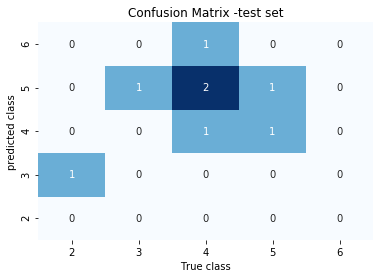

In [263]:
indices=np.unique(np.concatenate((predict_scale,Y_test)))

#print(indices)
matrix=metrics.confusion_matrix(predict_scale,Y_test)
#display(matrix)
dataframe=pd.DataFrame(matrix,index=indices,columns=indices)
conf_matrix=sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
conf_matrix.invert_yaxis()
plt.title("Confusion Matrix -test set")
plt.xlabel("True class")
plt.ylabel("predicted class")

Text(33,0.5,'predicted class')

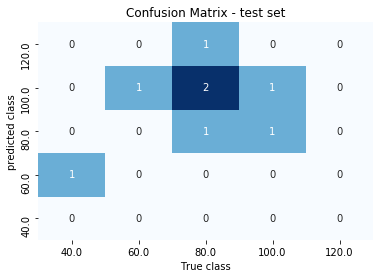

In [264]:
indices_float=np.unique(np.concatenate((predict_scale,Y_test)))
indices=indices_float*(140/num_classes)
#print(indices)
matrix=metrics.confusion_matrix(predict_scale,Y_test)
#display(matrix)
dataframe=pd.DataFrame(matrix,index=indices,columns=indices)
conf_matrix=sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
conf_matrix.invert_yaxis()
plt.title("Confusion Matrix - test set")
plt.xlabel("True class")
plt.ylabel("predicted class")

Text(33,0.5,'predicted class')

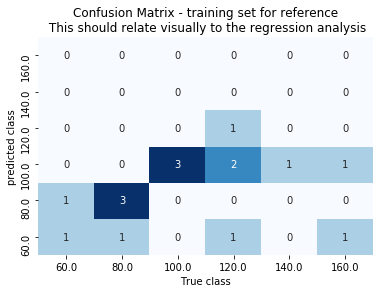

In [265]:
#Larger training data set
predict_scale_train=knn.predict(X_train_s)
indices_float=np.unique(np.concatenate((predict_scale_train,Y_train)))
indices=indices_float*(140/num_classes)
#print(indices)
matrix=metrics.confusion_matrix(predict_scale_train,Y_train)
#display(matrix)
dataframe=pd.DataFrame(matrix,index=indices,columns=indices)
conf_matrix=sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
conf_matrix.invert_yaxis()
plt.title("Confusion Matrix - training set for reference\n This should relate visually to the regression analysis")
plt.xlabel("True class")
plt.ylabel("predicted class")



###  k  (# neighbors) is adjusted iteratively to show optimum 


In [266]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1).fit(X_train,Y_train)
    d_print={'y_test':Y_test,'y_actual':knn.predict(X_test)}
    test_acc = sum(knn.predict(X_test)==Y_test)/len(Y_test)

    print("k=",i," Accuracy=",test_acc)

k= 1  Accuracy= 0.0
k= 2  Accuracy= 0.125
k= 3  Accuracy= 0.125
k= 4  Accuracy= 0.25
k= 5  Accuracy= 0.25
k= 6  Accuracy= 0.375
k= 7  Accuracy= 0.375
k= 8  Accuracy= 0.5
k= 9  Accuracy= 0.5



# Decision Tree Regressor
### Starting with 4 predictors and remove least important one. Notice the slight improvement (for the 3 predictor case) in training set performance (RMSE=19 vs 24 prior) and test set improvement  (28 vs 31 prior)
### By default, the decision tree was severely overfitting the training data while using too many branches and too few samples per leaf.  Test/train set results improved with use of max_depth=2-3, min_samples_leaf=3

In [102]:
from sklearn.tree import DecisionTreeRegressor
X2t= result[["xloc","yloc","BVf","lbs-ft"]][:64]
np.random.seed(1)
df = pd.DataFrame(data=X2t)
df["y"]=y
df=df.dropna(how='any',axis=0)


yt=df["y"]
#display(df)
del(df["y"])
X_train, X_test,y_train,y_test = train_test_split(df, yt, test_size=0.3)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
decisiontree=DecisionTreeRegressor(random_state=0,max_depth=3,min_samples_leaf=3)
dt_model=decisiontree.fit(X_train,y_train)
dft=pd.DataFrame(data={'y_predict':dt_model.predict(X_test),'y_actual':y_test})

dft_train=pd.DataFrame(data={'y_train':dt_model.predict(X_train),'y_actual':y_train})
print("Training data")
display(dft_train)
MSE=np.average(np.power(dft_train["y_train"]-dft_train["y_actual"],2))
print("Training set, MSE=",MSE,", RMSE=",np.power(MSE,0.5))
print("Test data")
display(dft)
MSE=np.average(np.power(dft["y_predict"]-dft["y_actual"],2))
print("Test set, MSE=",MSE,", RMSE=",np.power(MSE,0.5))

Training data


,y_train,y_actual
4,102.333333,107.0
29,75.800000,82.0
10,132.750000,106.0
11,75.800000,87.0
31,102.333333,83.0
3,75.800000,69.0
26,105.500000,133.0
2,75.800000,43.0
25,105.500000,93.0
43,132.750000,120.0


Training set, MSE= 334.4510416666667 , RMSE= 18.288002670238942
Test data


,y_predict,y_actual
23,105.500000,138.0
28,132.750000,76.0
5,102.333333,139.0
24,105.500000,79.0
30,75.800000,87.0
27,75.800000,82.0
18,132.750000,165.0
6,105.500000,100.0


Test set, MSE= 944.7124305555557 , RMSE= 30.73617462462685


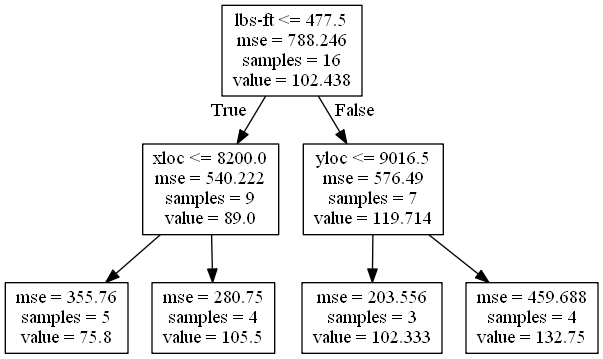

In [104]:
#pip install pydotplus
#pip install graphviz
#Add "C:\Program Files (x86)\Graphviz2.38\bin" to system's path (replace with your directory, quotes not needed)
import pydotplus
from sklearn import tree
from IPython.display import Image
import collections
dot_data=tree.export_graphviz(decisiontree,out_file=None,feature_names=["xloc","yloc","BVf","lbs-ft"])

graph=pydotplus.graph_from_dot_data(dot_data)

#color code isn't working?
colors = ('brown', 'green')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))


for edge in edges:
    #print(edge)
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        #print(dest,colors[i])
        dest.set_fillcolor(colors[i])

graph.write_png("CFF_tree.png")
Image(graph.create_png())

## Decision tree with 3 predictors, using same test/train split as above. Some improvement in RMSE

Training data


,y_train,y_actual
4,118.400000,107.0
29,85.333333,82.0
10,80.600000,106.0
11,80.600000,87.0
31,85.333333,83.0
3,80.600000,69.0
26,129.333333,133.0
2,80.600000,43.0
25,129.333333,93.0
43,118.400000,120.0


Training set, MSE= 369.1083333333333 , RMSE= 19.212192309399082
Test data


,y_predict,y_actual
23,118.400000,138.0
28,85.333333,76.0
5,118.400000,139.0
24,118.400000,79.0
30,85.333333,87.0
27,129.333333,82.0
18,129.333333,165.0
6,85.333333,100.0


Test set, MSE= 772.3044444444445 , RMSE= 27.790366036532237


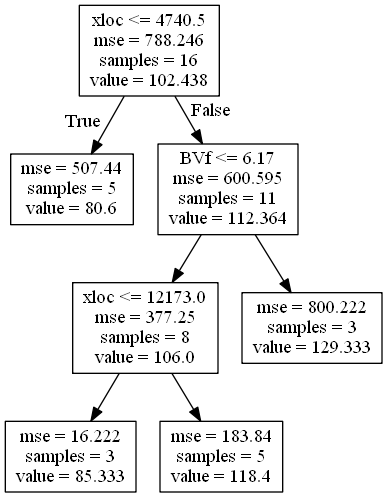

In [110]:
#Remove one of the 4 predictors

if "lbs-ft" in X_train.columns: del(X_train["lbs-ft"])
if "lbs-ft" in X_test.columns: del(X_test["lbs-ft"])

decisiontree=DecisionTreeRegressor(random_state=0,max_depth=3,min_samples_leaf=3)
dt_model=decisiontree.fit(X_train,y_train)
dft=pd.DataFrame(data={'y_predict':dt_model.predict(X_test),'y_actual':y_test})

dft_train=pd.DataFrame(data={'y_train':dt_model.predict(X_train),'y_actual':y_train})
print("Training data")
display(dft_train)
MSE=np.average(np.power(dft_train["y_train"]-dft_train["y_actual"],2))
print("Training set, MSE=",MSE,", RMSE=",np.power(MSE,0.5))
print("Test data")
display(dft)
MSE=np.average(np.power(dft["y_predict"]-dft["y_actual"],2))
print("Test set, MSE=",MSE,", RMSE=",np.power(MSE,0.5))

dot_data=tree.export_graphviz(decisiontree,out_file=None,feature_names=["xloc","yloc","BVf"])
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())